#Import Google Drive & libs

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import gdown
from imblearn.over_sampling import SMOTE

In [7]:
gdown.download("https://drive.google.com/uc?id=1FAPHdTezvWYAB5stQmMnmCnz--OvyQFy",
               "BankChurners.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FAPHdTezvWYAB5stQmMnmCnz--OvyQFy
To: /content/BankChurners.csv
100%|██████████| 1.39M/1.39M [00:00<00:00, 131MB/s]


'BankChurners.csv'

#Load csv file to DataFrame


In [8]:
file_path = "/content/BankChurners.csv"
df = pd.read_csv(file_path)


#Distribution

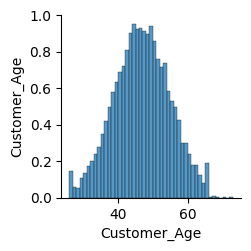

In [9]:
subset = df[["Customer_Age"]]
sns.pairplot(subset)
plt.show()

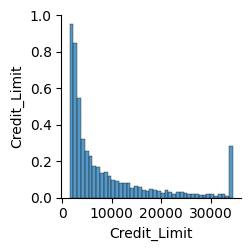

In [ ]:
subset = df[["Credit_Limit"]]
sns.pairplot(subset)
plt.show()

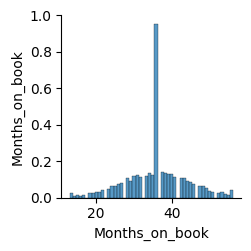

In [ ]:
subset = df[["Months_on_book"]]
sns.pairplot(subset)
plt.show()

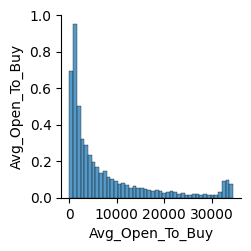

In [ ]:
subset = df[["Avg_Open_To_Buy"]]
sns.pairplot(subset)
plt.show()

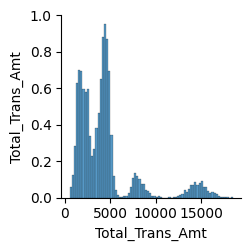

In [ ]:
subset = df[["Total_Trans_Amt"]]
sns.pairplot(subset)
plt.show()

#Correlation

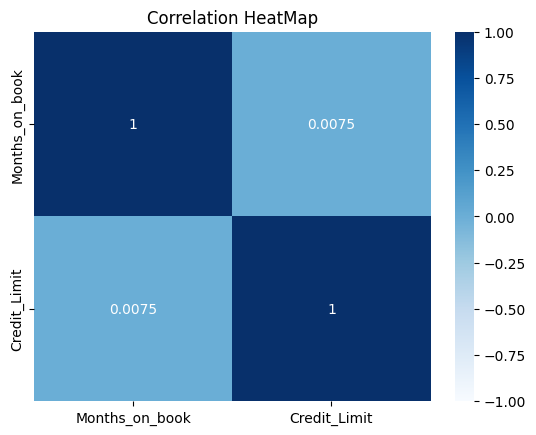

In [10]:
correlation = df[["Months_on_book", "Credit_Limit"]].corr()
sns.heatmap(correlation, annot=True, cmap = "Blues", vmin=-1, vmax=1)
plt.title("Correlation HeatMap")
plt.show()

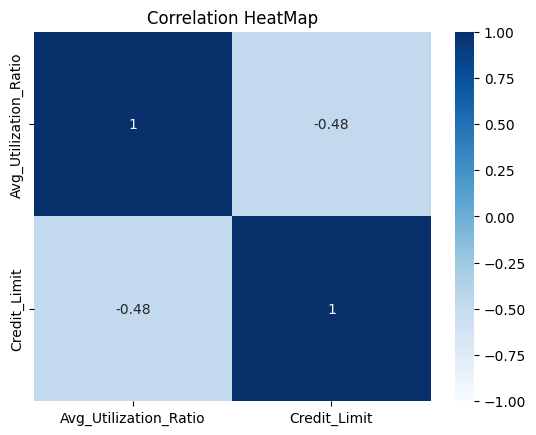

In [11]:
correlation = df[["Avg_Utilization_Ratio", "Credit_Limit"]].corr()
sns.heatmap(correlation, annot=True, cmap = "Blues", vmin=-1, vmax=1)
plt.title("Correlation HeatMap")
plt.show()

In [12]:
df["Gender"] = df["Gender"].map({'M': 1, "F":0})
df["Marital_Status"] = df["Marital_Status"].map({'Divorced':0, 'Married':1, 'Single':2, 'Unknown':3})
df["Education_Level"] = df["Education_Level"].map({'High School':0, 'Graduate':1, 'College':2, 'Post-Graduate':3, "Doctorate":4, "Uneducated":5, "Unknown":6})

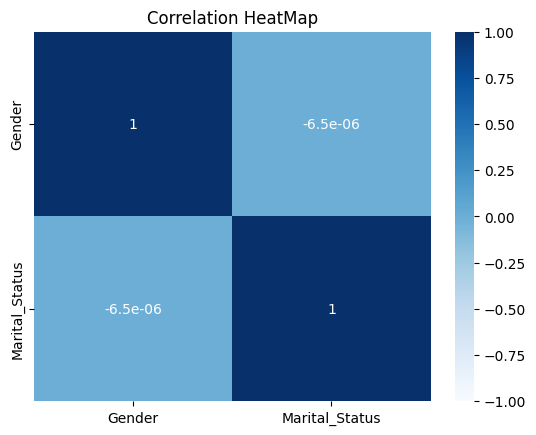

In [13]:
correlation = df[["Gender", "Marital_Status"]].corr()
sns.heatmap(correlation, annot=True, cmap = "Blues", vmin=-1, vmax=1)
plt.title("Correlation HeatMap")
plt.show()

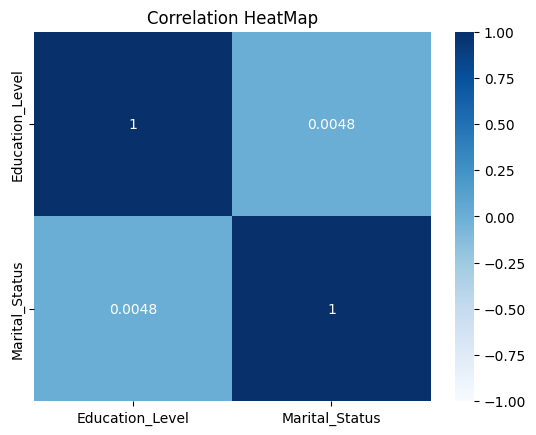

In [14]:
correlation = df[["Education_Level", "Marital_Status"]].corr()
sns.heatmap(correlation, annot=True, cmap = "Blues", vmin=-1, vmax=1)
plt.title("Correlation HeatMap")
plt.show()

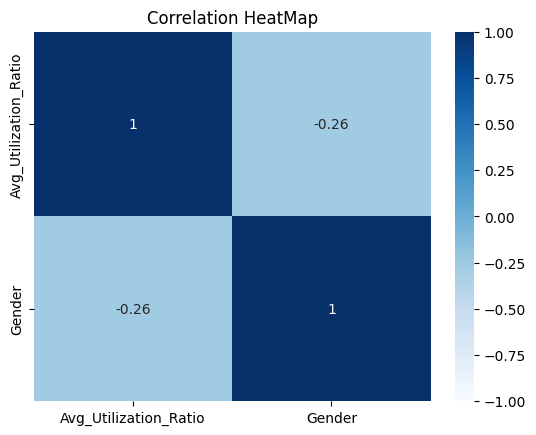

In [15]:
correlation = df[["Avg_Utilization_Ratio", "Gender"]].corr()
sns.heatmap(correlation, annot=True, cmap = "Blues", vmin=-1, vmax=1)
plt.title("Correlation HeatMap")
plt.show()

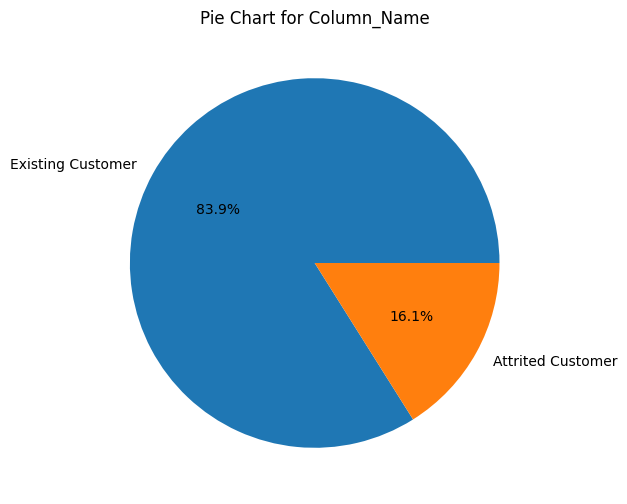

In [17]:
value_counts = df['Attrition_Flag'].value_counts()  # Count occurrences of each unique value
value_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Pie Chart for Column_Name")
plt.ylabel("")  # Remove the y-axis label
plt.show()

# Preparing the data for the classification model

In [42]:
file_path = "/content/BankChurners.csv"
df = pd.read_csv(file_path)

##Encoding dataset



In [43]:
df = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [44]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': False, 'Attrited Customer': True})

In [46]:
df = df.drop(columns=["CLIENTNUM"])

##Normalize

In [47]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)
#df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


## Split

In [48]:
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

In [50]:
### ---- uncomment and run this section for SMOTE algorithm: ---- ###


smote = SMOTE(random_state=73)
X, y = smote.fit_resample(X, y)

In [51]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

# Split the train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 73, stratify=y_train )


## Train

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


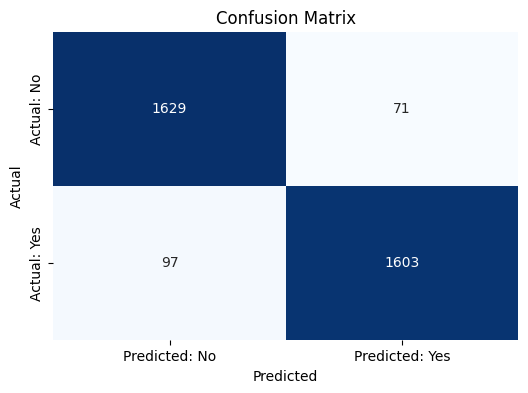

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.96      0.95      1700
         Yes       0.96      0.94      0.95      1700

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400



In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:")
print(report)

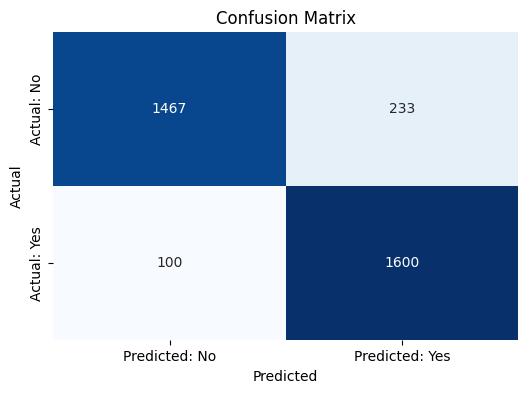

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.86      0.90      1700
         Yes       0.87      0.94      0.91      1700

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:")
print(report)

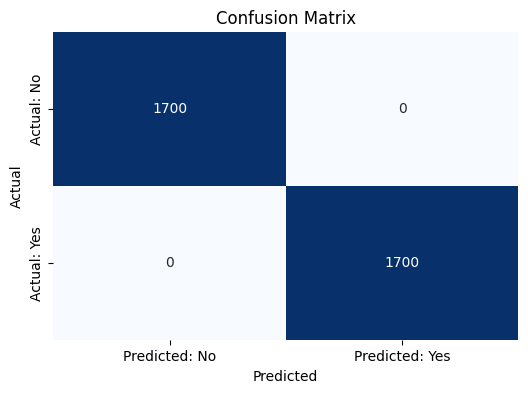

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1700
         Yes       1.00      1.00      1.00      1700

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



In [54]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100, random_state=73)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:")
print(report)

# Question 2

In [140]:
gdown.download("https://drive.google.com/uc?id=1k2bqaYhtYSVf4Zj0OttuU0mc3PXWKcSo",
               "data.npy", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k2bqaYhtYSVf4Zj0OttuU0mc3PXWKcSo
To: /content/data.npy
100%|██████████| 928/928 [00:00<00:00, 2.16MB/s]


'data.npy'

In [141]:
data = np.load("/content/data.npy")

In [142]:
np.shape(data)

(100,)

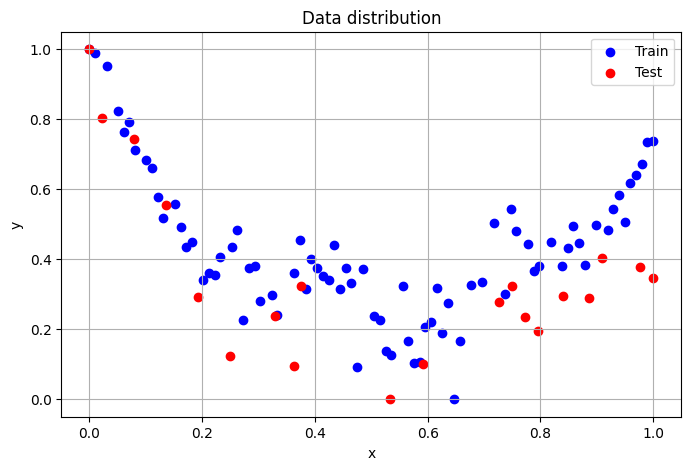

In [128]:
x = np.linspace(-10, 10, len(data))
x_train, x_test, y_train, y_test = train_test_split(x, data, test_size=0.2, random_state = 73)

x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))
y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, label="Train", color='blue')
plt.scatter(x_test, y_test, label="Test", color='red')
plt.title("Data distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [143]:
class LR:
  def __init__(self):
    self.parameters = {}

  def forward(self, input):
    m = self.parameters['m']
    b = self.parameters['b']
    output = np.multiply(m, input) +  b
    return output

  def backward(self, input, label, pred, learning_rate):
    df = pred - label
    dm = 2 * np.mean(np.multiply(input, df))
    dc = 2 * np.mean(df)

    self.parameters['m'] = self.parameters['m'] - learning_rate * dm
    self.parameters['b'] = self.parameters['b'] - learning_rate * dc

  def loss_func(self, label, pred):
    error = np.mean((label - pred) ** 2) # MSE
    return error

  def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration, increamental):
    train_loss = []
    test_loss = []

    self.parameters['m'] = np.random.uniform(0, 1)
    self.parameters['b'] = np.random.uniform(0, 1)

    if increamental == 0:
      for i in range(iteration):
            #train
            output = self.forward(x_train)
            loss = self.loss_func(y_train, output)
            train_loss.append(loss)


            #test
            loss = self.predict(x_test, y_test)
            test_loss.append(loss)

            #backward
            self.backward(x_train, y_train, output, learning_rate)

    elif increamental == 1:
      for i in range(iteration):
            #train
            output = self.forward(x_train)
            loss = self.loss_func(y_train, output)
            if i == iteration-1:
              train_loss.append(loss)

            #test
            loss = self.predict(x_test, y_test)
            if i == iteration-1:
              test_loss.append(loss)

            #backward
            self.backward(x_train, y_train, output, learning_rate)

    return train_loss, test_loss



  def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss


  def plot_predictions(self, x_test, y_test, iteration):

      plt.scatter(x_test, y_test, color='blue', label='Test Data Points')


      x_vals = np.linspace(min(x_test), max(x_test), 100)
      y_vals = self.parameters['m'] * x_vals + self.parameters['b']

      plt.plot(x_vals, y_vals, color='red', label='Regression Line')


      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title(f'Linear Regression ({iteration} iterations)')
      plt.legend()
      plt.show()


  def plot_loss_bar(self, loss_bar,string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
          plt.title('Train Loss Over Iterations')
        elif string == "test":
          plt.title('test Loss Over Iterations')
        plt.show()




In [144]:
iteration = 5000
learning_rate = 0.01
model = LR()

In [145]:
train_loss, test_loss = model.train(x_train, y_train, x_test, y_test, learning_rate, iteration, 0)

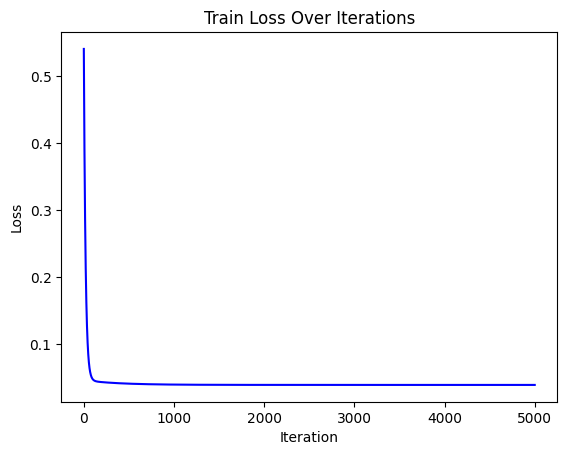

In [146]:
model.plot_loss_bar(train_loss,"train")

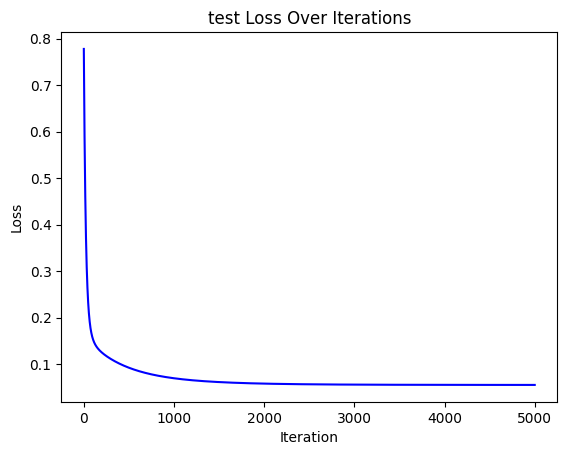

In [135]:
model.plot_loss_bar(test_loss,"test")

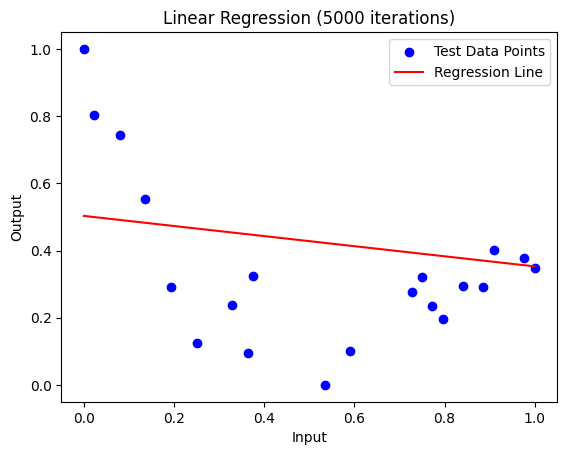

In [147]:
model.plot_predictions(x_test, y_test, iteration)

# increamental training

In [148]:
test_loss_inc = []
train_loss_inc = []
for i in range(1, len(x_train)+1):

    train_loss, test_loss = model.train(x_train[:i], y_train[:i], x_test, y_test, learning_rate, iteration, 1)
    test_loss_inc.append(test_loss)
    train_loss_inc.append(train_loss)


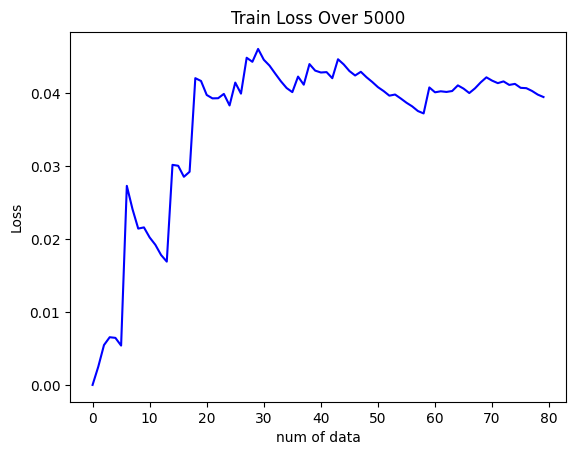

In [149]:
def plot_loss(loss_bar,string, iteration):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('num of data')
        plt.ylabel('Loss')

        if string == "train":
          plt.title(f'Train Loss Over {iteration}')
        elif string == "test":
          plt.title(f'test Loss Over {iteration}')
        plt.show()


plot_loss(train_loss_inc,"train",iteration)

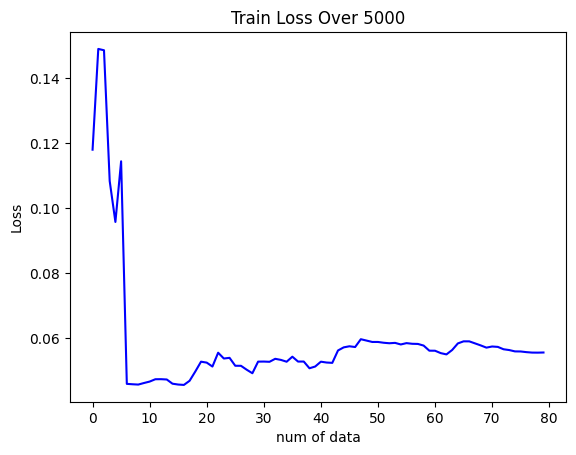

In [150]:
plot_loss(test_loss_inc,"train",iteration)

# Quadratic Model

In [151]:
class quadratic_LR:
  def __init__(self):
    self.parameters = {}

  def forward(self, input):
    a = self.parameters['a']
    m = self.parameters['m']
    b = self.parameters['b']
    output = np.multiply(a, (input** 2)) + np.multiply(m, input) +  b
    return output

  def backward(self, input, label, pred, learning_rate):
    df = pred - label
    da = 2 * np.mean(np.multiply(input**2, df))
    dm = 2 * np.mean(np.multiply(input, df))
    dc = 2 * np.mean(df)

    self.parameters['a'] = self.parameters['a'] - learning_rate * da
    self.parameters['m'] = self.parameters['m'] - learning_rate * dm
    self.parameters['b'] = self.parameters['b'] - learning_rate * dc


  def loss_func(self, label, pred):
    error = np.mean((pred - label) ** 2) # MSE
    return error

  def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration):
    train_loss = []
    test_loss = []
    self.parameters['a'] = np.random.uniform(0, 0.1)
    self.parameters['m'] = np.random.uniform(0, 0.1)
    self.parameters['b'] = np.random.uniform(0, 0.1)
    print(self.parameters['a'], self.parameters['m'], self.parameters['b'])


    for i in range(iteration):
            #train
      output = self.forward(x_train)
      loss = self.loss_func(y_train, output)

      train_loss.append(loss)


            #test
      loss = self.predict(x_test, y_test)
      test_loss.append(loss)

            #backward
      self.backward(x_train, y_train, output, learning_rate)

    print(self.parameters['a'], self.parameters['m'], self.parameters['b'])
    return train_loss, test_loss



  def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss


  def plot_predictions(self, x_test, y_test, iteration):

      plt.scatter(x_test, y_test, color='blue', label='Test Data Points')


      x_vals = np.linspace(min(x_test), max(x_test), 100)

      y_vals = self.parameters['a'] * (x_vals**2) + self.parameters['m'] * x_vals + self.parameters['b']

      plt.plot(x_vals, y_vals, color='red', label='Regression function')


      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title(f'Quadratic Regression ({iteration} iterations)')
      plt.legend()
      plt.show()


  def plot_loss_bar(self, loss_bar,string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
          plt.title('Train Loss Quadratic')
        elif string == "test":
          plt.title('test Loss Quadratic')
        plt.show()


iteration = 35000
learning_rate = 0.01
Qmodel = quadratic_LR()

train_loss, test_loss = Qmodel.train(x_train, y_train, x_test, y_test, learning_rate, iteration)


0.033905222611281115 0.0629685216839903 0.08596618569302981
1.956159806430048 -2.1288994837722317 0.8376754050036155


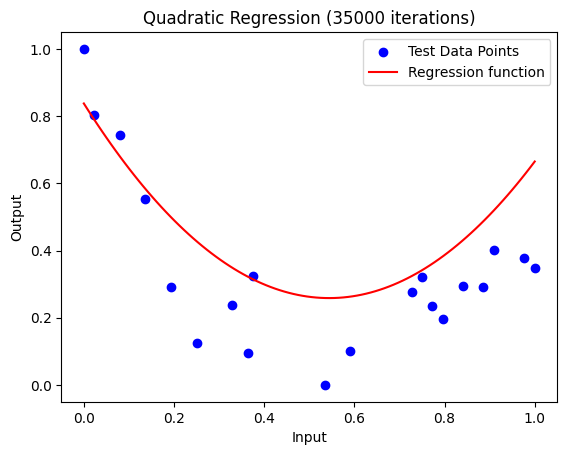

In [152]:
Qmodel.plot_predictions(x_test, y_test, iteration)

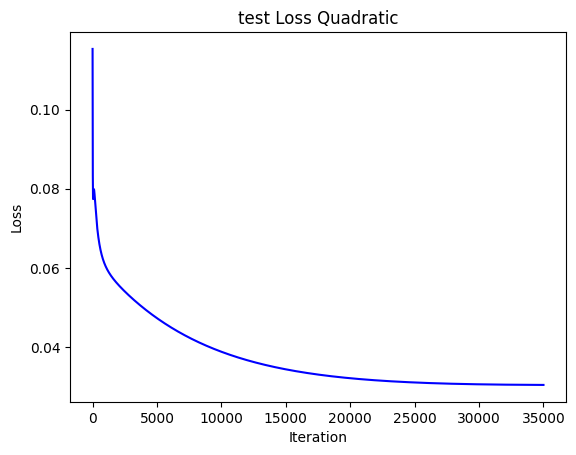

In [153]:
Qmodel.plot_loss_bar(test_loss,"test")

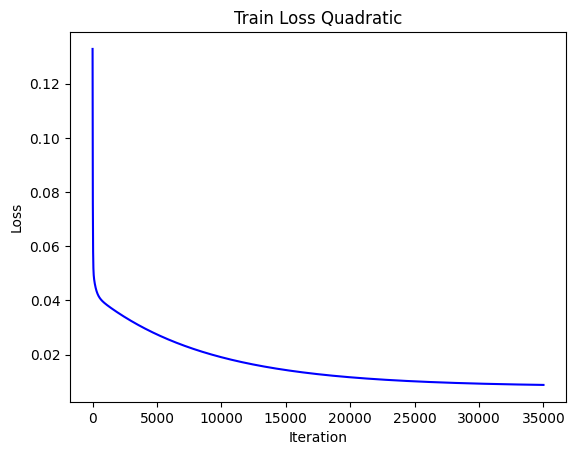

In [154]:
Qmodel.plot_loss_bar(train_loss,"train")

#Hyperbolic Model

In [155]:
class Hyperbolic_LR:
  def __init__(self):
    self.parameters = {}

  def forward(self, input):
    n = self.parameters['n']
    a = self.parameters['a']
    m = self.parameters['m']
    b = self.parameters['b']
    output = np.multiply(n, (input** 3))  + np.multiply(a, (input** 2)) + np.multiply(m, input) +  b
    return output

  def backward(self, input, label, pred, learning_rate):
    df = pred - label
    dn = 2 * np.mean(np.multiply(input**3, df))
    da = 2 * np.mean(np.multiply(input**2, df))
    dm = 2 * np.mean(np.multiply(input, df))
    dc = 2 * np.mean(df)

    self.parameters['n'] = self.parameters['n'] - learning_rate * dn
    self.parameters['a'] = self.parameters['a'] - learning_rate * da
    self.parameters['m'] = self.parameters['m'] - learning_rate * dm
    self.parameters['b'] = self.parameters['b'] - learning_rate * dc


  def loss_func(self, label, pred):
    error = np.mean((pred - label) ** 2) # MSE
    return error

  def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration):
    train_loss = []
    test_loss = []
    self.parameters['n'] = np.random.uniform(0, 1)
    self.parameters['a'] = np.random.uniform(0, 1)
    self.parameters['m'] = np.random.uniform(0, 1)
    self.parameters['b'] = np.random.uniform(0, 1)


    for i in range(iteration):
            #train
      output = self.forward(x_train)
      loss = self.loss_func(y_train, output)

      train_loss.append(loss)


            #test
      loss = self.predict(x_test, y_test)
      test_loss.append(loss)

            #backward
      self.backward(x_train, y_train, output, learning_rate)

    return train_loss, test_loss



  def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss


  def plot_predictions(self, x_test, y_test, iteration):

      plt.scatter(x_test, y_test, color='blue', label='Test Data Points')


      x_vals = np.linspace(min(x_test), max(x_test), 100)

      y_vals = self.parameters['n'] * (x_vals**3) + self.parameters['a'] * (x_vals**2) + self.parameters['m'] * x_vals + self.parameters['b']

      plt.plot(x_vals, y_vals, color='red', label='Regression function')


      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title(f'Hyperbolic Regression ({iteration} iterations)')
      plt.legend()
      plt.show()


  def plot_loss_bar(self, loss_bar,string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
          plt.title('Train Loss Hyperbolic')
        elif string == "test":
          plt.title('test Loss Hyperbolic')
        plt.show()


iteration = 35000
learning_rate = 0.01
Hmodel = Hyperbolic_LR()

train_loss, test_loss = Hmodel.train(x_train, y_train, x_test, y_test, learning_rate, iteration)


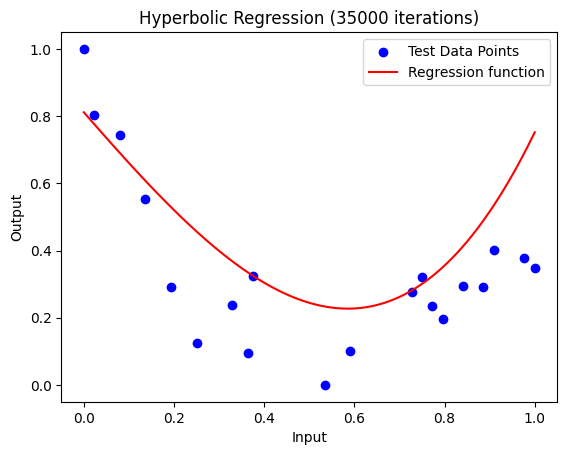

In [156]:
Hmodel.plot_predictions(x_test, y_test, iteration)

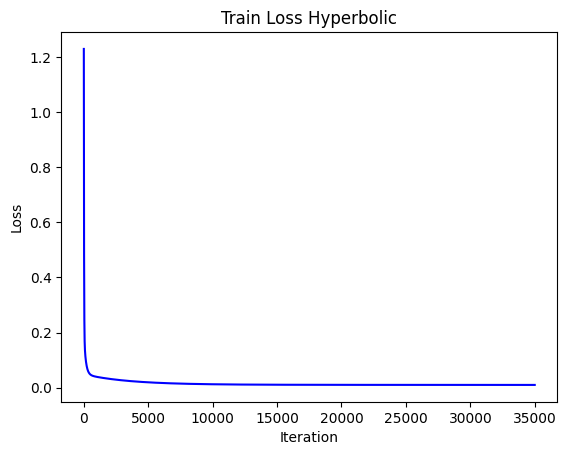

In [157]:
Hmodel.plot_loss_bar(train_loss,"train")

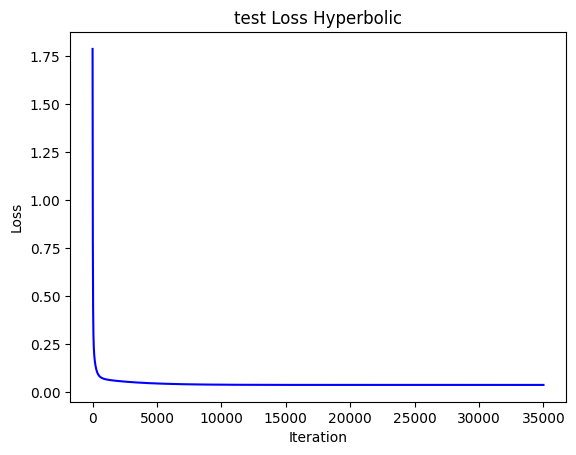

In [158]:
Hmodel.plot_loss_bar(test_loss,"test")

#ّFourth Degree

In [159]:
class Fourth_LR:
  def __init__(self):
    self.parameters = {}

  def forward(self, input):
    f = self.parameters['f']
    n = self.parameters['n']
    a = self.parameters['a']
    m = self.parameters['m']
    b = self.parameters['b']
    output = np.multiply(f, (input** 4)) + np.multiply(n, (input** 3))  + np.multiply(a, (input** 2)) + np.multiply(m, input) +  b
    return output

  def backward(self, input, label, pred, learning_rate):
    df = pred - label

    dff = 2 * np.mean(np.multiply(input**4, df))
    dn = 2 * np.mean(np.multiply(input**3, df))
    da = 2 * np.mean(np.multiply(input**2, df))
    dm = 2 * np.mean(np.multiply(input, df))
    dc = 2 * np.mean(df)

    self.parameters['f'] = self.parameters['f'] - learning_rate * dff
    self.parameters['n'] = self.parameters['n'] - learning_rate * dn
    self.parameters['a'] = self.parameters['a'] - learning_rate * da
    self.parameters['m'] = self.parameters['m'] - learning_rate * dm
    self.parameters['b'] = self.parameters['b'] - learning_rate * dc


  def loss_func(self, label, pred):
    error = np.mean((pred - label) ** 2) # MSE
    return error

  def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration):
    train_loss = []
    test_loss = []

    self.parameters['f'] = np.random.uniform(0, 1)
    self.parameters['n'] = np.random.uniform(0, 1)
    self.parameters['a'] = np.random.uniform(0, 1)
    self.parameters['m'] = np.random.uniform(0, 1)
    self.parameters['b'] = np.random.uniform(0, 1)


    for i in range(iteration):
            #train
      output = self.forward(x_train)
      loss = self.loss_func(y_train, output)

      train_loss.append(loss)


            #test
      loss = self.predict(x_test, y_test)
      test_loss.append(loss)

            #backward
      self.backward(x_train, y_train, output, learning_rate)

    return train_loss, test_loss



  def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss


  def plot_predictions(self, x_test, y_test, iteration):

      plt.scatter(x_test, y_test, color='blue', label='Test Data Points')


      x_vals = np.linspace(min(x_test), max(x_test), 100)

      y_vals = self.parameters['f'] * (x_vals**4) + self.parameters['n'] * (x_vals**3) + self.parameters['a'] * (x_vals**2) + self.parameters['m'] * x_vals + self.parameters['b']

      plt.plot(x_vals, y_vals, color='red', label='Regression function')


      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title(f'4th degree Regression ({iteration} iterations)')
      plt.legend()
      plt.show()


  def plot_loss_bar(self, loss_bar,string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
          plt.title('Train Loss 4th degree')
        elif string == "test":
          plt.title('test Loss 4th degree')
        plt.show()


iteration = 35000
learning_rate = 0.1
Fmodel = Fourth_LR()

train_loss, test_loss = Fmodel.train(x_train, y_train, x_test, y_test, learning_rate, iteration)


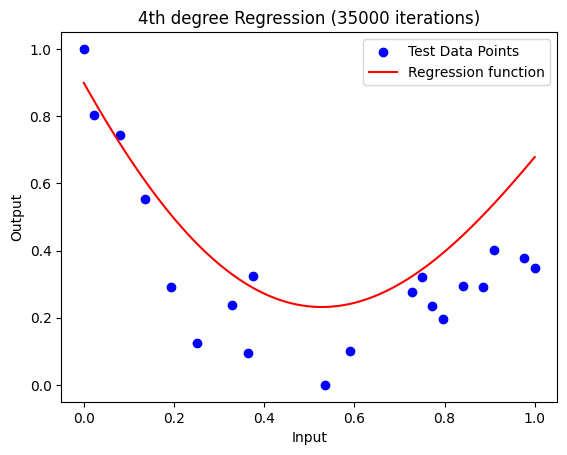

In [160]:
Fmodel.plot_predictions(x_test, y_test, iteration)

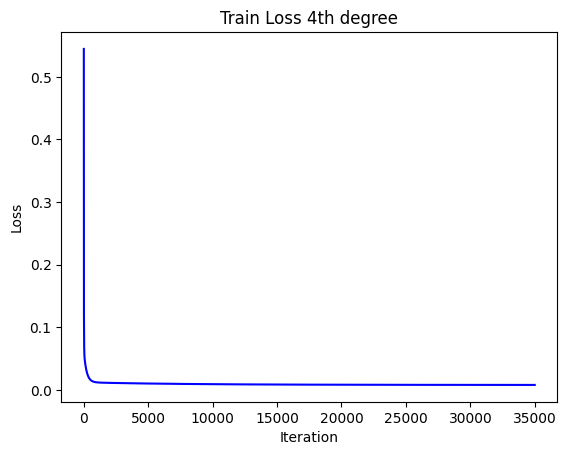

In [161]:
Fmodel.plot_loss_bar(train_loss,"train")

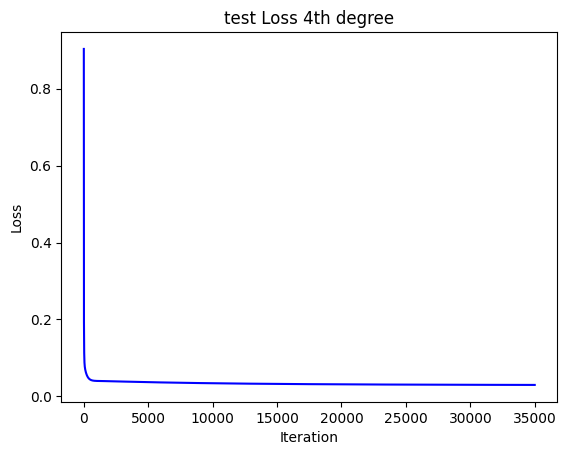

In [162]:
Fmodel.plot_loss_bar(test_loss,"test")

#fifth degree

In [163]:
class fifth_LR:
  def __init__(self):
    self.parameters = {}

  def forward(self, input):
    g = self.parameters['g']
    f = self.parameters['f']
    n = self.parameters['n']
    a = self.parameters['a']
    m = self.parameters['m']
    b = self.parameters['b']
    output = np.multiply(g, (input** 5)) + np.multiply(f, (input** 4)) + np.multiply(n, (input** 3))  + np.multiply(a, (input** 2)) + np.multiply(m, input) +  b
    return output

  def backward(self, input, label, pred, learning_rate):
    df = pred - label

    dg = 2 * np.mean(np.multiply(input**5, df))
    dff = 2 * np.mean(np.multiply(input**4, df))
    dn = 2 * np.mean(np.multiply(input**3, df))
    da = 2 * np.mean(np.multiply(input**2, df))
    dm = 2 * np.mean(np.multiply(input, df))
    dc = 2 * np.mean(df)

    self.parameters['g'] = self.parameters['g'] - learning_rate * dg
    self.parameters['f'] = self.parameters['f'] - learning_rate * dff
    self.parameters['n'] = self.parameters['n'] - learning_rate * dn
    self.parameters['a'] = self.parameters['a'] - learning_rate * da
    self.parameters['m'] = self.parameters['m'] - learning_rate * dm
    self.parameters['b'] = self.parameters['b'] - learning_rate * dc


  def loss_func(self, label, pred):
    error = np.mean((pred - label) ** 2) # MSE
    return error

  def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration):
    train_loss = []
    test_loss = []

    self.parameters['g'] = np.random.uniform(0, 1)
    self.parameters['f'] = np.random.uniform(0, 1)
    self.parameters['n'] = np.random.uniform(0, 1)
    self.parameters['a'] = np.random.uniform(0, 1)
    self.parameters['m'] = np.random.uniform(0, 1)
    self.parameters['b'] = np.random.uniform(0, 1)


    for i in range(iteration):
            #train
      output = self.forward(x_train)
      loss = self.loss_func(y_train, output)

      train_loss.append(loss)


            #test
      loss = self.predict(x_test, y_test)
      test_loss.append(loss)

            #backward
      self.backward(x_train, y_train, output, learning_rate)

    return train_loss, test_loss



  def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss


  def plot_predictions(self, x_test, y_test, iteration):

      plt.scatter(x_test, y_test, color='blue', label='Test Data Points')


      x_vals = np.linspace(min(x_test), max(x_test), 100)

      y_vals = self.parameters['g'] * (x_vals**5) + self.parameters['f'] * (x_vals**4) + self.parameters['n'] * (x_vals**3) + self.parameters['a'] * (x_vals**2) + self.parameters['m'] * x_vals + self.parameters['b']

      plt.plot(x_vals, y_vals, color='red', label='Regression function')


      plt.xlabel('Input')
      plt.ylabel('Output')
      plt.title(f'5th degree Regression ({iteration} iterations)')
      plt.legend()
      plt.show()


  def plot_loss_bar(self, loss_bar,string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
          plt.title('Train Loss 5th degree')
        elif string == "test":
          plt.title('test Loss 5th degree')
        plt.show()


iteration = 35000
learning_rate = 0.1
fivemodel = fifth_LR()

train_loss, test_loss = fivemodel.train(x_train, y_train, x_test, y_test, learning_rate, iteration)


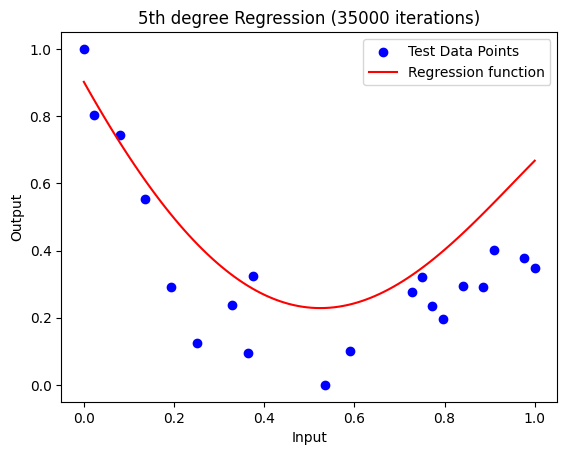

In [164]:
fivemodel.plot_predictions(x_test, y_test, iteration)

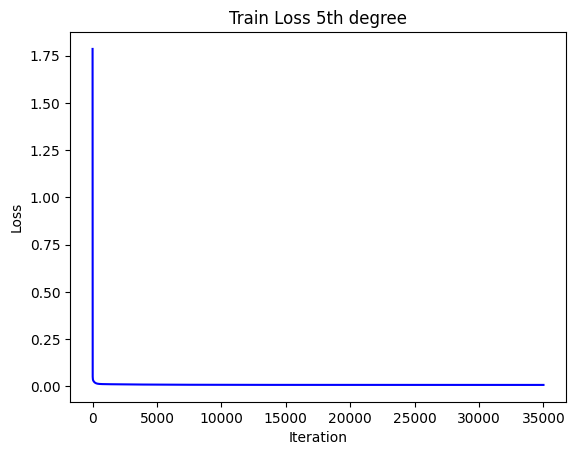

In [165]:
fivemodel.plot_loss_bar(train_loss, "train")

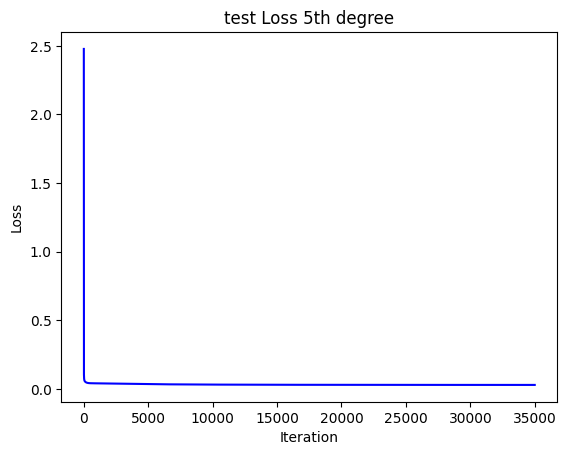

In [166]:
fivemodel.plot_loss_bar(test_loss, "test")

In [167]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [168]:
random_forest = RandomForestRegressor(random_state=73)
knn = KNeighborsRegressor()
svm = SVR()

models = {
    "Random Forest": random_forest,
    "KNN": knn,
    "SVM": svm
}

results = {
    "Model": [],
    "Train Loss (MSE)": [],
    "Test Loss (MSE)": [],
    "Train R2 Score": [],
    "Test R2 Score": []
}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)


    y_test_pred = model.predict(x_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results["Model"].append(model_name)
    results["Train Loss (MSE)"].append(train_mse)
    results["Test Loss (MSE)"].append(test_mse)
    results["Train R2 Score"].append(train_r2)
    results["Test R2 Score"].append(test_r2)

results_df = pd.DataFrame(results)
print(results_df)


           Model  Train Loss (MSE)  Test Loss (MSE)  Train R2 Score  \
0  Random Forest          0.000996         0.031042        0.975935   
1            KNN          0.004226         0.031087        0.897926   
2            SVM          0.006848         0.030445        0.834597   

   Test R2 Score  
0       0.480718  
1       0.479974  
2       0.490712  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Regularization (I used L2)

Final parameters: 1.5681455694930042 -1.7199687588769474 0.7630770811910847


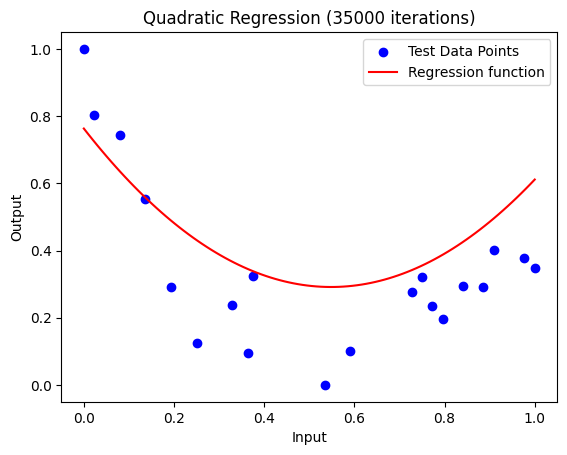

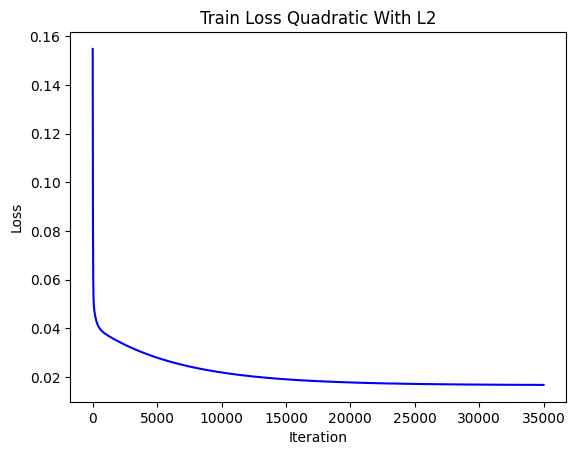

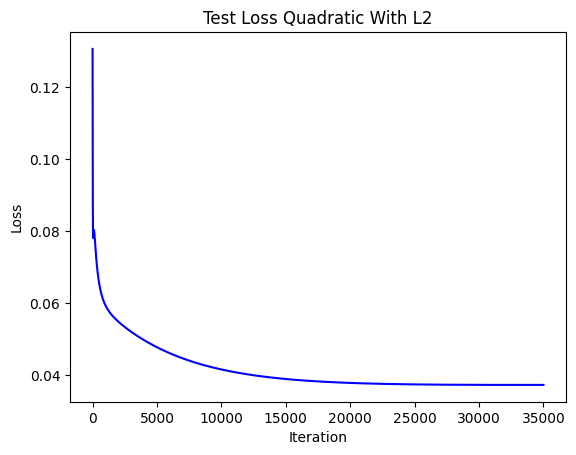

In [169]:
import numpy as np
import matplotlib.pyplot as plt

class quadratic_LR:
    def __init__(self, reg_lambda=0.01):
        self.parameters = {}
        self.reg_lambda = reg_lambda #REGULARIZATION

    def forward(self, input):
        a = self.parameters['a']
        m = self.parameters['m']
        b = self.parameters['b']
        output = np.multiply(a, (input ** 2)) + np.multiply(m, input) + b
        return output

    def backward(self, input, label, pred, learning_rate):
        df = pred - label
        da = 2 * np.mean(np.multiply(input ** 2, df)) + 2 * self.reg_lambda * self.parameters['a'] #REGULARIZATION
        dm = 2 * np.mean(np.multiply(input, df)) + 2 * self.reg_lambda * self.parameters['m'] #REGULARIZATION
        dc = 2 * np.mean(df)  # No #REGULARIZATION for bias

        self.parameters['a'] -= learning_rate * da
        self.parameters['m'] -= learning_rate * dm
        self.parameters['b'] -= learning_rate * dc

    def loss_func(self, label, pred):
        error = np.mean((pred - label) ** 2)  # MSE
        reg_term = self.reg_lambda * (self.parameters['a'] ** 2 + self.parameters['m'] ** 2)
        return error + reg_term

    def train(self, x_train, y_train, x_test, y_test, learning_rate, iteration):
        train_loss = []
        test_loss = []
        self.parameters['a'] = np.random.uniform(0, 0.1)
        self.parameters['m'] = np.random.uniform(0, 0.1)
        self.parameters['b'] = np.random.uniform(0, 0.1)
        #print("Initial parameters:", self.parameters['a'], self.parameters['m'], self.parameters['b'])

        for i in range(iteration):
            # Train
            output = self.forward(x_train)
            loss = self.loss_func(y_train, output)
            train_loss.append(loss)

            # Test
            test_loss.append(self.predict(x_test, y_test))

            # Backward
            self.backward(x_train, y_train, output, learning_rate)

        print("Final parameters:", self.parameters['a'], self.parameters['m'], self.parameters['b'])
        return train_loss, test_loss

    def predict(self, input, label):
        pred = self.forward(input)
        loss = self.loss_func(label, pred)
        return loss

    def plot_predictions(self, x_test, y_test, iteration):
        plt.scatter(x_test, y_test, color='blue', label='Test Data Points')

        x_vals = np.linspace(min(x_test), max(x_test), 100)
        y_vals = self.parameters['a'] * (x_vals ** 2) + self.parameters['m'] * x_vals + self.parameters['b']

        plt.plot(x_vals, y_vals, color='red', label='Regression function')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title(f'Quadratic Regression ({iteration} iterations)')
        plt.legend()
        plt.show()

    def plot_loss_bar(self, loss_bar, string):
        plt.plot(range(len(loss_bar)), loss_bar, linestyle='-', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        if string == "train":
            plt.title('Train Loss Quadratic With L2')
        elif string == "test":
            plt.title('Test Loss Quadratic With L2')
        plt.show()



iteration = 35000
learning_rate = 0.01
reg_lambda = 0.001
Qmodel = quadratic_LR(reg_lambda=reg_lambda)

train_loss, test_loss = Qmodel.train(x_train, y_train, x_test, y_test, learning_rate, iteration)

Qmodel.plot_predictions(x_test, y_test, iteration)
Qmodel.plot_loss_bar(train_loss, "train")
Qmodel.plot_loss_bar(test_loss, "test")
